In [69]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import export_graphviz
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import train_test_split, GridSearchCV 
%matplotlib inline

# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

Do sentiment extraction

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
data = pd.read_csv('dataset.csv', index_col=False)

In [4]:
del data['Unnamed: 0']

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiment = DataFrame(columns=('Positive', 'Negative', 'Neutral'))
sentiment2 = DataFrame(columns=('Positive', 'Negative', 'Neutral'))
counter = 0
for article in data['Body']:
    article_compound = 0
    article_neg = 0
    article_pos = 0
    article_neu = 0
    counter = counter + 1
    try:
        sentences = sent_tokenize(article.decode('utf-8'))
        l = len(sentences)
    except:
        print counter
        sentences = ['test', 'test2 jh']
        l = 1000000000000
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        article_compound = article_compound + vs['compound']
        article_neg = article_neg + vs['neg']
        article_pos = article_pos + vs['pos']
        article_neu = article_neu + vs['neu']
    article_sentiment = DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Body_Positive', 'Body_Negative', 'Body_Neutral', 'Body_Compound'))
    sentiment = sentiment.append(article_sentiment, ignore_index = True)
for article in data['Headline']:
    article_compound = 0
    article_neg = 0
    article_pos = 0
    article_neu = 0
    counter = counter + 1
    try:
        sentences = sent_tokenize(article.decode('utf-8'))
        l = len(sentences)
    except:
        print counter
        sentences = ['test', 'test2 jh']
        l = 1000000000000
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        article_compound = article_compound + vs['compound']
        article_neg = article_neg + vs['neg']
        article_pos = article_pos + vs['pos']
        article_neu = article_neu + vs['neu']
    article_sentiment = DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Head_Positive', 'Head_Negative', 'Head_Neutral', 'Head_Compound'))
    sentiment2 = sentiment2.append(article_sentiment, ignore_index = True)

In [8]:
sentiment.describe()

,Body_Compound,Body_Negative,Body_Neutral,Body_Positive
count,20491.000000,20491.000000,20491.000000,20491.000000
mean,-0.072186,0.078561,0.863502,0.055915
std,0.190676,0.058599,0.066005,0.038073
min,-0.982900,0.000000,0.377000,0.000000
25%,-0.186580,0.039111,0.827857,0.030333
50%,-0.053340,0.069333,0.870273,0.050136
75%,0.049821,0.104750,0.906333,0.075214
max,0.778300,0.623000,1.000000,0.274000


In [9]:
sentiment2.describe()

,Head_Compound,Head_Negative,Head_Neutral,Head_Positive
count,20491.000000,20491.000000,20491.000000,20491.000000
mean,-0.163323,0.137163,0.820183,0.041144
std,0.341460,0.168192,0.181163,0.089797
min,-0.950100,0.000000,0.185000,0.000000
25%,-0.429000,0.000000,0.691000,0.000000
50%,0.000000,0.000000,0.826000,0.000000
75%,0.000000,0.256000,1.000000,0.000000
max,0.865800,0.815000,1.000000,0.592000


In [13]:
df = pd.concat([data, sentiment,sentiment2], axis=1)
del df['Positive']
del df['Neutral']
del df['Negative']

In [16]:
df

,Headline,Stance,Body,Body_Compound,Body_Negative,Body_Neutral,Body_Positive,Head_Compound,Head_Negative,Head_Neutral,Head_Positive
0,Small Meteorite Strikes in Nicaragua's Capital...,1,A small meteorite crashed into a wooded area i...,-0.023237,0.031062,0.948313,0.020625,-0.3612,0.238,0.762,0.000
1,What was fake on the Internet this week: Obama...,1,There is so much fake stuff on the Internet in...,0.012373,0.087455,0.810649,0.101935,0.2500,0.227,0.508,0.266
2,"Meteorite makes big crater in Nicaragua, gover...",1,"(CNN) -- A meteorite crashed down in Managua, ...",0.026365,0.063739,0.903609,0.032652,0.0000,0.000,1.000,0.000
3,Small Meteorite Strikes in Nicaragua's Capital...,1,"(CNN) -- A meteorite crashed down in Managua, ...",0.026365,0.063739,0.903609,0.032652,-0.3612,0.238,0.762,0.000
4,A soldier has been shot at Canada’s war memori...,1,A SOLDIER has been shot at Canada’s National W...,-0.358700,0.084333,0.915667,0.000000,-0.5994,0.218,0.782,0.000
5,Search launched for dog's owner after pooch fo...,1,Kai the shar pei-crossbreed was discovered tie...,0.109493,0.039133,0.863933,0.096800,-0.2960,0.157,0.756,0.087
6,’6 Days Darkness in December 2014′ 100% Fake; ...,1,An article saying NASA confirmed six days of “...,-0.102293,0.085733,0.881667,0.032667,-0.7269,0.413,0.493,0.094
7,Italian fisherman catches monstrous 280-pound ...,1,Italian fisherman Dino Ferrari landed what cou...,-0.092900,0.030667,0.969333,0.000000,0.0000,0.000,1.000,0.000
8,Macaulay Culkin Dead: Actor Once Again Victim ...,1,Macaulay Culkin is not dead. The actor is just...,-0.008665,0.121294,0.755000,0.123647,-0.9081,0.674,0.326,0.000
9,Saudi cleric condemns snowmen as anti-Islamic,1,DUBAI - A prominent Saudi Arabian cleric has w...,0.035538,0.077231,0.812615,0.110231,-0.5106,0.398,0.602,0.000


In [18]:
del df["Body"]
del df["Headline"]
df

,Stance,Body_Compound,Body_Negative,Body_Neutral,Body_Positive,Head_Compound,Head_Negative,Head_Neutral,Head_Positive
0,1,-0.023237,0.031062,0.948313,0.020625,-0.3612,0.238,0.762,0.000
1,1,0.012373,0.087455,0.810649,0.101935,0.2500,0.227,0.508,0.266
2,1,0.026365,0.063739,0.903609,0.032652,0.0000,0.000,1.000,0.000
3,1,0.026365,0.063739,0.903609,0.032652,-0.3612,0.238,0.762,0.000
4,1,-0.358700,0.084333,0.915667,0.000000,-0.5994,0.218,0.782,0.000
5,1,0.109493,0.039133,0.863933,0.096800,-0.2960,0.157,0.756,0.087
6,1,-0.102293,0.085733,0.881667,0.032667,-0.7269,0.413,0.493,0.094
7,1,-0.092900,0.030667,0.969333,0.000000,0.0000,0.000,1.000,0.000
8,1,-0.008665,0.121294,0.755000,0.123647,-0.9081,0.674,0.326,0.000
9,1,0.035538,0.077231,0.812615,0.110231,-0.5106,0.398,0.602,0.000


Modeling for classification

In [21]:
# split training and testing data and apply scaling
X_features = df.loc[:,['Body_Compound','Body_Negative','Body_Neutral','Body_Positive','Head_Negative','Head_Neutral','Head_Positive','Head_Compound']]
Y_targetClass = df.Stance
X_train,X_test,Y_train,Y_test = train_test_split(X_features,Y_targetClass,random_state=1000)
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set

LogisticRegression

In [22]:
model= LogisticRegression(C=1)
fitted_model=model.fit(X_train,Y_train)
fitted_model.score(X_test,Y_test)

0.65781768495022452

LDA

In [24]:
LDAmodelFitted = LinearDiscriminantAnalysis().fit(X_train, Y_train)
fitted_model.score(X_test,Y_test)

0.6552801093109506

QDA

In [27]:
QDAmodelFitted = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
fitted_model.score(X_test,Y_test)

0.6552801093109506

KNN

[0.69529572516103844, 0.65176654304118675, 0.70349404645715397, 0.68924458325200078, 0.69783330080031236, 0.69158696076517667, 0.69588131953933241, 0.68729260199102093, 0.69451493265664654, 0.68963497950419672, 0.68709740386492291, 0.68241264883857111, 0.68221745071247319, 0.68182705446027714, 0.68319344134296311]


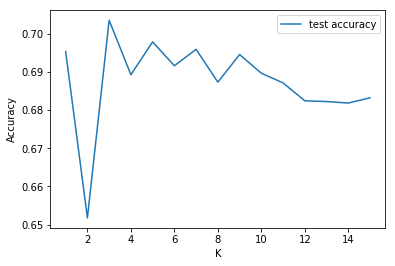

In [31]:
test_accuracy=[ ]
neighbor_setting =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for N_neighbor in neighbor_setting:
    knn=KNeighborsClassifier(n_neighbors=N_neighbor)
    knn.fit(X_train, Y_train)
    test_accuracy.append(knn.score(X_test,Y_test))
plt.plot(neighbor_setting,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()
print (test_accuracy)
plt.legend()
plt.show()

SVM

In [32]:
svmModel=SVC(kernel='rbf', gamma=0.2, C=0.1)
fitted_model=svmModel.fit(X_train,Y_train)
fitted_model.score(X_test,Y_test)

0.6552801093109506

In [76]:
scaler=preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed=scaler.transform(X_train) #apply scaling on training set
X_test_transformed=scaler.transform(X_test) #apply scaling on test set
best_score = 0
kflods = 5
for c in [0.001, 0.1, 1, 10, 1000]:
    for g in [0.001, 0.1, 1, 10, 1000]:
        svmModel=SVC(kernel='rbf', gamma=g, C=c)
        scores = cross_val_score(svmModel,X_train_transformed,Y_train,cv = kflods)
        score = np.mean(scores)
        if(score > best_score):
            best_score = score
            best_C = c
            best_gamma = g
SelectedSvmModel = SVC(kernel='rbf', gamma=best_gamma, C=best_C).fit(X_train_transformed,Y_train)
test_score = SelectedSvmModel.score(X_test_transformed,Y_test)
print("Best score on validation set is: ",best_score)
print("Best parameters: C=",best_C,"gamma = ",best_gamma)
print("Test set socre with best parameters is",test_score)

('Best score on validation set is: ', 0.69111075659176768)
('Best parameters: C=', 1000, 'gamma = ', 1000)
('Test set socre with best parameters is', 0.71032598087058363)


Tree Model

In [35]:
treeModel = DecisionTreeClassifier(random_state=0,max_depth=2,criterion='gini')
FittedTreeModel = treeModel.fit(X_train,Y_train)
FittedTreeModel.score(X_test,Y_test)RandomForest

0.6552801093109506

RandomForest

In [36]:
forestModel=RandomForestClassifier (n_estimators=4, max_features=2, max_depth=2, random_state=0)
FittedTreeModel = forestModel.fit(X_train,Y_train)
FittedTreeModel.score(X_test,Y_test)

0.6552801093109506

AdaBoost

In [37]:
BoostModel= AdaBoostClassifier(n_estimators=4, random_state=0)
fittedModel = BoostModel.fit(X_train,Y_train)
fittedModel.score(X_test,Y_test)

0.65996486433730239

Multi-layer neural network

In [38]:
MLPmodel=MLPClassifier(solver='sgd', activation='relu', random_state=0, hidden_layer_sizes=[10,5], alpha=0.5)
fittedModel = MLPmodel.fit(X_train_transformed,Y_train)
fittedModel.score(X_test_transformed,Y_test)

0.65586570368924457

In [39]:
MLPmodel=MLPClassifier(solver='lbfgs', activation='relu', random_state=10, hidden_layer_sizes=[10,5], alpha=0.5)
fittedModel = MLPmodel.fit(X_train_transformed,Y_train)
fittedModel.score(X_test_transformed,Y_test)

0.66367362873316416

Lightgbm

In [75]:
# create dataset for lightgbm
lb = preprocessing.LabelBinarizer()
y_train=lb.fit_transform(Y_train)
y_test=lb.fit_transform(Y_test)

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)

# specify your configurations as a dict
params = {  
    'task': 'train',  
    'boosting_type': 'gbdt',  
    'objective': 'multiclass',  
    'num_class': 4,  
    'verbose': 0,  
    'metric': 'multi_logloss',  
    'max_bin': 255,  
    'max_depth': 7,  
    'learning_rate': 0.3,  
    'nthread': 4,  
    'n_estimators': 85,  
    #'feature_fraction': 0.8  
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Start predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print(y_pred)

Start training...
[1]	valid_0's multi_logloss: 0.953598
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's multi_logloss: 0.885204
[3]	valid_0's multi_logloss: 0.839755
[4]	valid_0's multi_logloss: 0.805824
[5]	valid_0's multi_logloss: 0.781958
[6]	valid_0's multi_logloss: 0.763962
[7]	valid_0's multi_logloss: 0.749428
[8]	valid_0's multi_logloss: 0.738609
[9]	valid_0's multi_logloss: 0.729418
[10]	valid_0's multi_logloss: 0.72051
[11]	valid_0's multi_logloss: 0.714514
[12]	valid_0's multi_logloss: 0.706203
[13]	valid_0's multi_logloss: 0.702917
[14]	valid_0's multi_logloss: 0.695947
[15]	valid_0's multi_logloss: 0.691024
[16]	valid_0's multi_logloss: 0.687012
[17]	valid_0's multi_logloss: 0.681688
[18]	valid_0's multi_logloss: 0.679339
[19]	valid_0's multi_logloss: 0.677746
[20]	valid_0's multi_logloss: 0.673441
Start predicting...
[[  2.81833604e-16   1.84565310e-01   4.34067226e-02   7.72027968e-01]
 [  3.64578363e-16   3.80814295e-01   1.82640397e-01   4.365